# See tachometric curves to decide Sensory delay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# data

In [2]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# drop rows from df where intended_fix, LED_onset_time and timed_fix are nan
df = df.dropna(subset=['intended_fix', 'LED_onset_time', 'timed_fix'])
tuple_column = list(zip(df['intended_fix'], df['intended_fix'] - df['LED_onset_time']))

In [3]:
# LED OFF Trials

df = df[  df['LED_trial'] == 0 ]

# 1 is right , -1 is left
df['choice'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else random.choice([1, -1])))

# 1 or 0 if the choice was correct or not
df['correct'] = (df['ILD'] * df['choice']).apply(lambda x: 1 if x > 0 else 0)

# rt wrt stim
df['rt'] = df['timed_fix'] - df['intended_fix']

In [4]:
bw = 0.005
bins = np.arange(-2, 5, bw)

df['RT_bin'] = pd.cut(df['rt'], bins=bins, include_lowest=True)
grouped_by_rt_bin = df.groupby('RT_bin', observed=False)['correct'].agg(['mean', 'count'])
grouped_by_rt_bin['bin_mid'] = grouped_by_rt_bin.index.map(lambda x: x.mid)


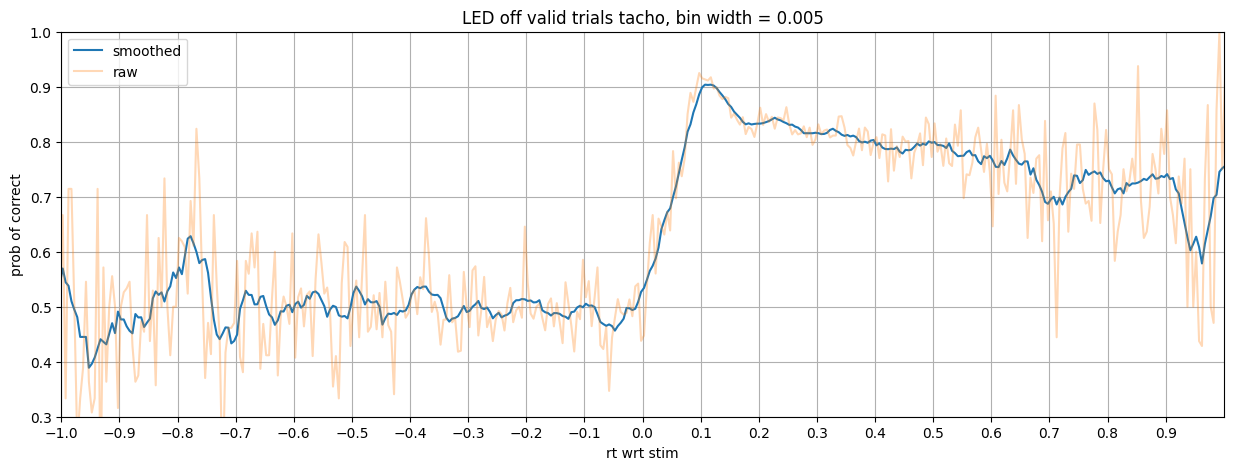

In [5]:
plt.figure(figsize=(15,5))
grouped_by_rt_bin['smoothed_mean'] = grouped_by_rt_bin['mean'].rolling(window=10, center=True).mean()

plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['smoothed_mean'], label='smoothed')
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['mean'], label='raw', alpha=0.3)

plt.xlim(0,1)
plt.xlabel('rt wrt stim')
plt.ylabel('prob of correct')
plt.title(f'LED off valid trials tacho, bin width = {bw}')
plt.grid()
plt.ylim(0.3, 1)
plt.xlim(-1, 1)
plt.legend();
xticks = np.arange(-1, 1, 0.1)
plt.xticks(xticks);

Text(0.5, 1.0, 'RT wrt fix, aborts < 0.3 removed')

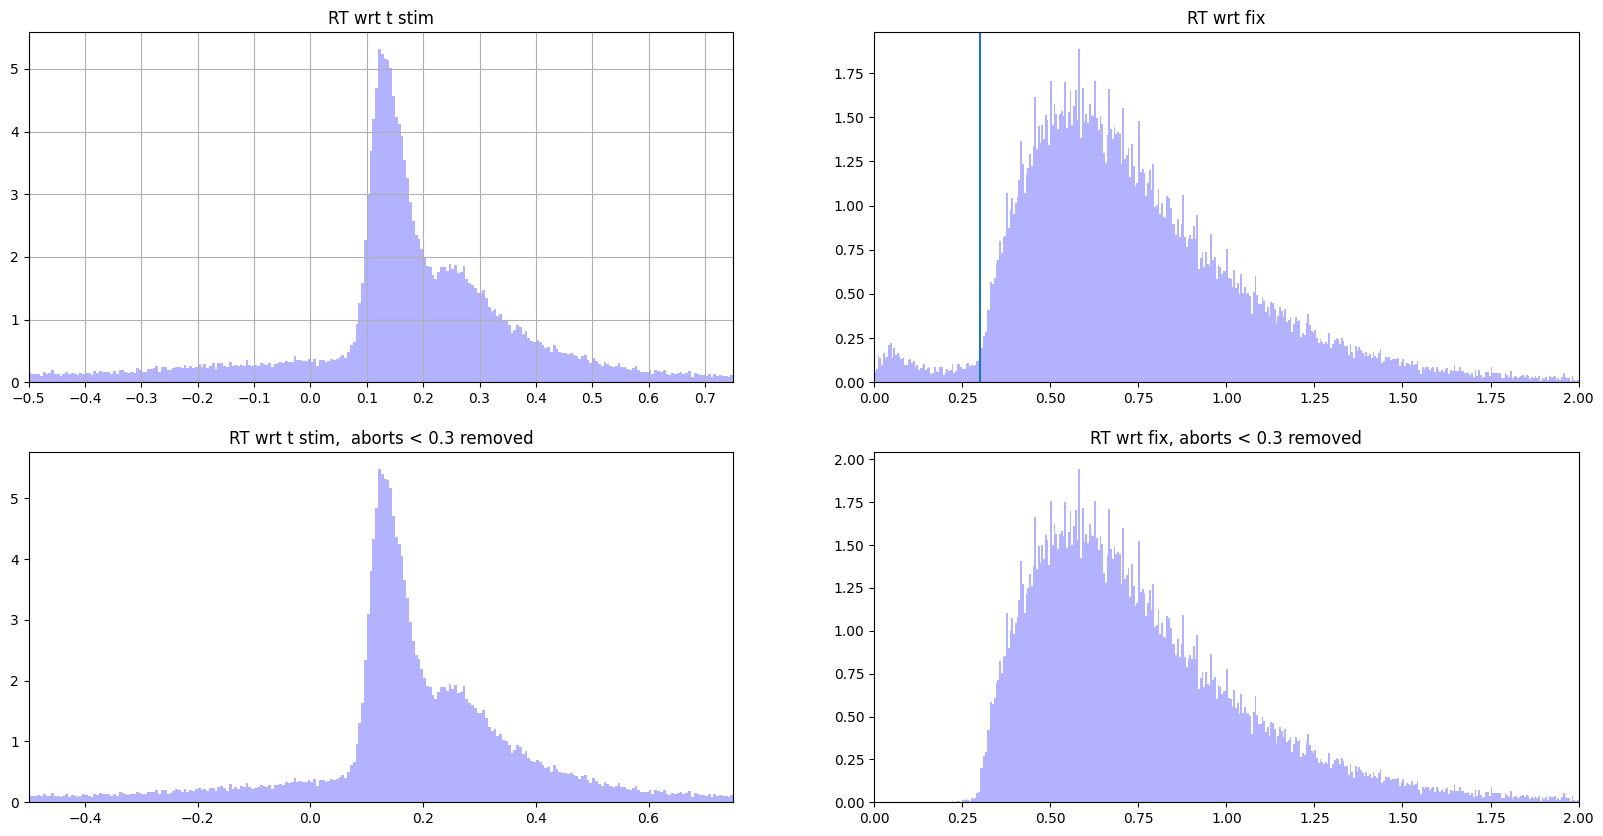

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(df['rt'], bins=bins, alpha=0.3, color='b', density=True);
plt.xlim(-0.5, 0.75)
plt.title('RT wrt t stim')
plt.grid()
plt.xticks(np.arange(-0.5, 0.75, 0.1))

plt.subplot(2,2,2)
plt.hist(df['timed_fix'], bins=bins, alpha=0.3, color='b', density=True);
plt.xlim(0,2)
plt.axvline(0.3)
plt.title('RT wrt fix')

plt.subplot(2,2,3)
df_aborts_removed = df[~((df['timed_fix'] < df['intended_fix']) & (df['timed_fix'] < 0.3))]
plt.hist(df_aborts_removed['rt'], bins=bins, alpha=0.3, color='b', density=True);
plt.xlim(-0.5, 0.75)
plt.title('RT wrt t stim,  aborts < 0.3 removed')

plt.subplot(2,2,4)
plt.hist(df_aborts_removed['timed_fix'], bins=bins, alpha=0.3, color='b', density=True);
plt.xlim(0,2)
plt.title('RT wrt fix, aborts < 0.3 removed')

# tacho with trunc removed

In [8]:
df_aborts_removed = df[~((df['timed_fix'] < df['intended_fix']) & (df['timed_fix'] < 0.3))]

df_aborts_removed.loc[:, 'RT_bin'] = pd.cut(df_aborts_removed['rt'], bins=bins, include_lowest=True)
aborts_trunc_grouped = df_aborts_removed.groupby('RT_bin', observed=False)['correct'].agg(['mean', 'count'])
aborts_trunc_grouped['bin_mid'] = aborts_trunc_grouped.index.map(lambda x: x.mid)

Text(0.5, 0, 'mid pt of bin of rt wrt stim')

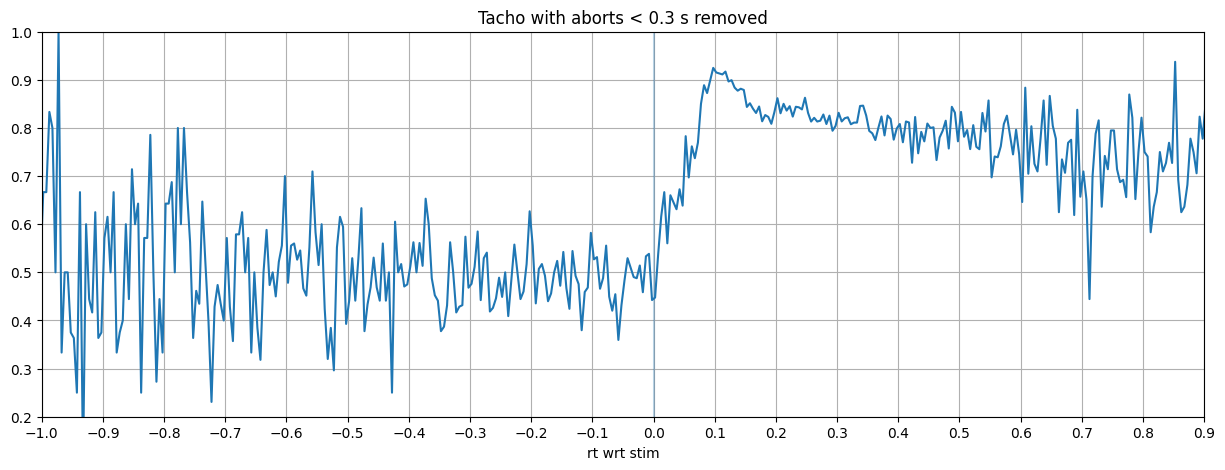

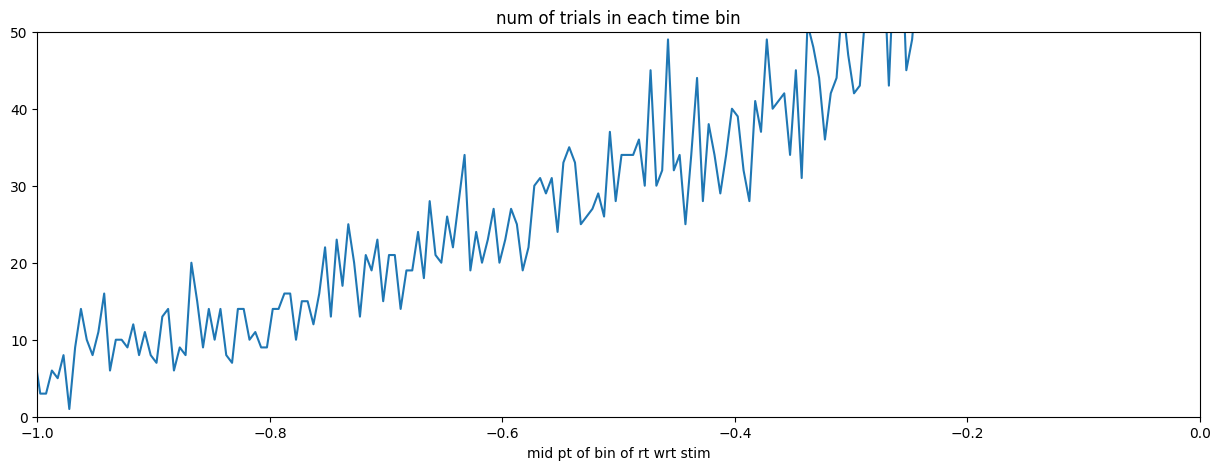

In [22]:
plt.figure(figsize=(15,5))
plt.plot(aborts_trunc_grouped['bin_mid'], aborts_trunc_grouped['mean'], label='raw')
plt.xlim(-0.75, 0.5)
plt.xlabel('rt wrt stim')
plt.title('Tacho with aborts < 0.3 s removed')
plt.axvline(0, alpha=0.3)
plt.ylim(0.2, 1)
xticks = np.arange(-1, 1, 0.1)
plt.xticks(xticks);
plt.grid();

plt.figure(figsize=(15,5))
plt.plot(aborts_trunc_grouped['bin_mid'], aborts_trunc_grouped['count'], label='raw')
plt.xlim(-1, 0)
plt.ylim(0, 50)
plt.title('num of trials in each time bin')
plt.xlabel('mid pt of bin of rt wrt stim')

Text(0.5, 0, 'stim')

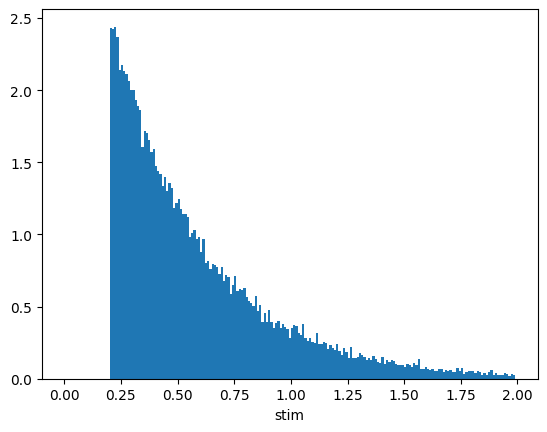

In [28]:
plt.hist(df['intended_fix'], bins=np.arange(0, 2, 0.01), density=True);
plt.xlabel('stim')